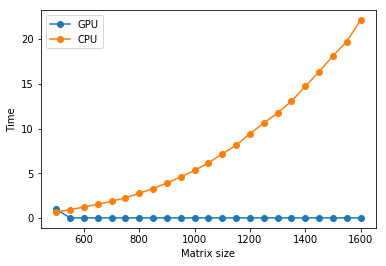

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.config.gpu.set_per_process_memory_growth(True)
import time

def get_times(maximum_time):
    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():
#             print("####### Calculating on the " + device_name + " #######")
            shape = (size,size)
            data_type = tf.float16
            start_time = time.time()
            with tf.device(device_name):
                r1 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random.uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)

                time_taken = time.time() - start_time
                device_times[device_name].append(time_taken)

#             print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(20)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-', label="GPU")
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-', label="CPU")
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.legend()
plt.show()